In [30]:
import os
import torch
import pymongo
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from bdp import data_path
from bdp.data.crypto.create_dataset_files import create_merged_dataframe
from bdp import models_path

crypto_plots_dir = os.path.join(models_path,"crypto_plots")
if not os.path.isdir(crypto_plots_dir):
    os.makedirs(crypto_plots_dir)

    
client = pymongo.MongoClient()
db = client["crypto"]

In [31]:
db.collection_names()

<ipython-input-31-8ff4d2505e25>:1: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  db.collection_names()


['birth_birth_2021-06-14',
 'birth_2021-06-08',
 'birth_2021-06-02',
 'birth_2021-05-10',
 'birth_2021-06-14',
 'birth_2021-06-16',
 'birth_2021-06-17']

In [56]:
database_name = "2021-06-17"

In [57]:
number_of_cryptos = 10
collection = db["birth_{0}".format(database_name)]
crypto_folder = os.path.join(data_path, "raw", "crypto")
data_folder = os.path.join(crypto_folder, database_name)
collection.create_index([('survival_time',-1)])

top_coins_name = []
for a in collection.find().sort([("last_marketcap",-1)]).limit(number_of_cryptos):
    top_coins_name.append(a["id"])

In [58]:
data_merged,coins_data = create_merged_dataframe(data_folder,
                                                 collection,
                                                 break_point=number_of_cryptos,
                                                 all_coins_ids=top_coins_name,
                                                 span="day")
data_merged = data_merged.fillna(0.)

Current Coin 1 ethereum
Current Coin 2 tether
Current Coin 3 binancecoin
Current Coin 4 cardano
Current Coin 5 dogecoin
Current Coin 6 ripple
Current Coin 7 usd-coin
Current Coin 8 polkadot
Current Coin 9 uniswap


In [59]:
#data_merged[""]

In [60]:
columns_ids = [coin_data["id"] for coin_data in coins_data]
price_df = data_merged[:-1]["price"]
price_df.columns = columns_ids
price_df['market'] = pd.Series(price_df.values.sum(axis=1), index=price_df.index)

In [61]:
price_df.resample("1Min").max()

,bitcoin,ethereum,tether,binancecoin,cardano,dogecoin,ripple,usd-coin,polkadot,uniswap,market
time,,,,,,,,,,,
2021-06-16 13:14:00,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.850294,0.995673,0.00000,22.57893,22.57893
2021-06-16 13:15:00,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.00000
2021-06-16 13:16:00,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.00000
2021-06-16 13:17:00,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.00000
2021-06-16 13:18:00,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-17 13:11:00,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.00000
2021-06-17 13:12:00,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.00000
2021-06-17 13:13:00,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.00000


In [50]:
corr = price_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,bitcoin,ethereum,tether,binancecoin,cardano,dogecoin,ripple,usd-coin,polkadot,uniswap,market
bitcoin,1.00,0.04,0.01,0.04,0.02,0.01,0.03,0.03,0.03,0.03,1.00
ethereum,0.04,1.00,-0.00,0.02,0.03,0.01,0.02,0.03,0.01,0.02,0.10
tether,0.01,-0.00,1.00,-0.00,-0.00,-0.00,-0.00,0.01,0.01,-0.00,0.01
binancecoin,0.04,0.02,-0.00,1.00,0.01,0.02,0.02,0.03,0.01,0.01,0.05
cardano,0.02,0.03,-0.00,0.01,1.00,0.02,0.03,0.02,0.03,0.04,0.03
dogecoin,0.01,0.01,-0.00,0.02,0.02,1.00,0.04,0.01,0.01,0.03,0.01
ripple,0.03,0.02,-0.00,0.02,0.03,0.04,1.00,0.05,0.01,0.01,0.03
usd-coin,0.03,0.03,0.01,0.03,0.02,0.01,0.05,1.00,0.02,0.01,0.03
polkadot,0.03,0.01,0.01,0.01,0.03,0.01,0.01,0.02,1.00,0.05,0.03
uniswap,0.03,0.02,-0.00,0.01,0.04,0.03,0.01,0.01,0.05,1.00,0.03


In [22]:
correlation_values = corr.values
upper_diagonal = np.triu_indices_from(correlation_values)
correlation_values = correlation_values[upper_diagonal]
print(correlation_values.shape)
print(correlation_values.mean())
print(correlation_values.std())

(125751,)
nan
nan


c:\users\cesar\desktop\projects\general\deep_random_fields\results\crypto_plots\Correlations.png


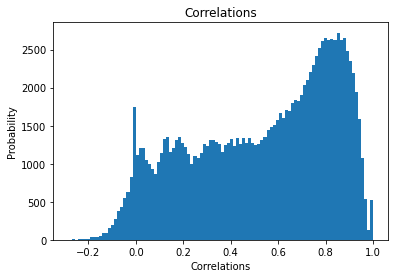

In [23]:
stuff = plt.hist(correlation_values,bins=100)
plt.xlabel('Correlations')
plt.ylabel('Probability')
plt.title(r'Correlations')
plt.savefig(os.path.join(crypto_plots_dir,"Correlations.png"))
print(os.path.join(crypto_plots_dir,"Correlations.png"))

In [28]:
correlation_values = corr.values
correlation_values = correlation_values[-1,:]
print(correlation_values.shape)
print(correlation_values.mean())
print(correlation_values.std())

(501,)
nan
nan


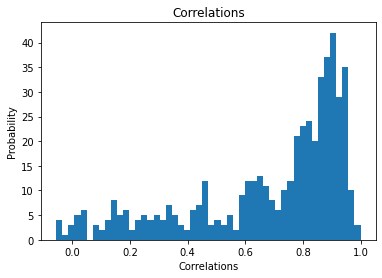

In [29]:
stuff = plt.hist(correlation_values,bins=50)
plt.xlabel('Correlations')
plt.ylabel('Probability')
plt.title(r'Correlations')
plt.savefig(os.path.join(crypto_plots_dir,"Market_Correlations.png"))

In [18]:
corr = price_df[400:1500].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,bitcoin,ethereum,tether,binancecoin,cardano,dogecoin,ripple,usd-coin,polkadot,uniswap
bitcoin,1.00,0.89,0.69,0.71,0.81,0.85,0.83,0.00,nan,nan
ethereum,0.89,1.00,0.61,0.69,0.88,0.84,0.87,-0.11,nan,nan
tether,0.69,0.61,1.00,0.93,0.53,0.68,0.60,0.32,nan,nan
binancecoin,0.71,0.69,0.93,1.00,0.67,0.75,0.71,0.23,nan,nan
cardano,0.81,0.88,0.53,0.67,1.00,0.87,0.95,-0.06,nan,nan
dogecoin,0.85,0.84,0.68,0.75,0.87,1.00,0.92,0.04,nan,nan
ripple,0.83,0.87,0.60,0.71,0.95,0.92,1.00,0.05,nan,nan
usd-coin,0.00,-0.11,0.32,0.23,-0.06,0.04,0.05,1.00,nan,nan
polkadot,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
uniswap,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [15]:
corr = price_df[1161:].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,bitcoin,ethereum,tether,binancecoin,cardano,dogecoin,ripple,usd-coin,polkadot,uniswap
bitcoin,1.00,0.90,0.91,0.85,0.88,0.64,0.65,0.84,0.97,0.90
ethereum,0.90,1.00,0.94,0.93,0.96,0.86,0.83,0.93,0.92,0.93
tether,0.91,0.94,1.00,0.88,0.93,0.80,0.68,0.97,0.91,0.90
binancecoin,0.85,0.93,0.88,1.00,0.93,0.88,0.84,0.88,0.91,0.97
cardano,0.88,0.96,0.93,0.93,1.00,0.84,0.80,0.94,0.93,0.95
dogecoin,0.64,0.86,0.80,0.88,0.84,1.00,0.80,0.85,0.70,0.81
ripple,0.65,0.83,0.68,0.84,0.80,0.80,1.00,0.71,0.70,0.79
usd-coin,0.84,0.93,0.97,0.88,0.94,0.85,0.71,1.00,0.86,0.89
polkadot,0.97,0.92,0.91,0.91,0.93,0.70,0.70,0.86,1.00,0.95
uniswap,0.90,0.93,0.90,0.97,0.95,0.81,0.79,0.89,0.95,1.00


In [16]:
corr = price_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,bitcoin,ethereum,tether,binancecoin,cardano,dogecoin,ripple,usd-coin,polkadot,uniswap
bitcoin,1.00,0.91,0.91,0.84,0.88,0.63,0.63,0.84,0.93,0.87
ethereum,0.91,1.00,0.91,0.90,0.96,0.83,0.74,0.90,0.89,0.89
tether,0.91,0.91,1.00,0.88,0.90,0.78,0.55,0.97,0.90,0.89
binancecoin,0.84,0.90,0.88,1.00,0.91,0.88,0.59,0.89,0.91,0.97
cardano,0.88,0.96,0.90,0.91,1.00,0.82,0.73,0.91,0.90,0.91
dogecoin,0.63,0.83,0.78,0.88,0.82,1.00,0.54,0.85,0.71,0.82
ripple,0.63,0.74,0.55,0.59,0.73,0.54,1.00,0.51,0.50,0.53
usd-coin,0.84,0.90,0.97,0.89,0.91,0.85,0.51,1.00,0.88,0.90
polkadot,0.93,0.89,0.90,0.91,0.90,0.71,0.50,0.88,1.00,0.95
uniswap,0.87,0.89,0.89,0.97,0.91,0.82,0.53,0.90,0.95,1.00
